In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
class Box:
    def __init__(self, bounds=None, left:int=0, bottom:int=0, right:int=0, top:int=0):
        if bounds is not None: self.left,self.bottom,self.right,self.top = bounds
        else: self.left,self.bottom,self.right,self.top = left,bottom,right,top
        self.width, self.height = self.right -self.left, self.top -self.bottom
    def __str__(self):
        return "left:{} bottom:{} right:{} top:{} width:{} height:{}".format(
            self.left, self.bottom, self.right, self.top, self.width, self.height)
    def in_bounds(self, x:int, y:int) -> bool:
        return self.left < x < self.right and self.bottom < y < self.top

In [3]:
geodata = gpd.GeoDataFrame(columns=["ROOT","PATH","BOX","DTM","DSM","SHP"])
geodata.loc[len(geodata)]=["K15","./",Box(),"DTM","DSM","./Shapes/ANTWERPEN_L72_2020/Bpn_ReBu.shp"]
geodata.to_csv("./geotest.csv")

In [ ]:
with open("./geotest.csv", "a") as csv:
    csv.write("K15","./",Box(),"DTM","DSM","./Shapes/ANTWERPEN_L72_2020/Bpn_ReBu.shp")

In [4]:
geodada = gpd.read_file("./geotest.csv")
geodada.loc[0].BOX

'left:0 bottom:0 right:0 top:0 width:0 height:0'

In [37]:
antwerpen = gpd.read_file(geodada.loc[0].SHP)

In [47]:
antwerpen = antwerpen.geometry

Took 42.21 seconds


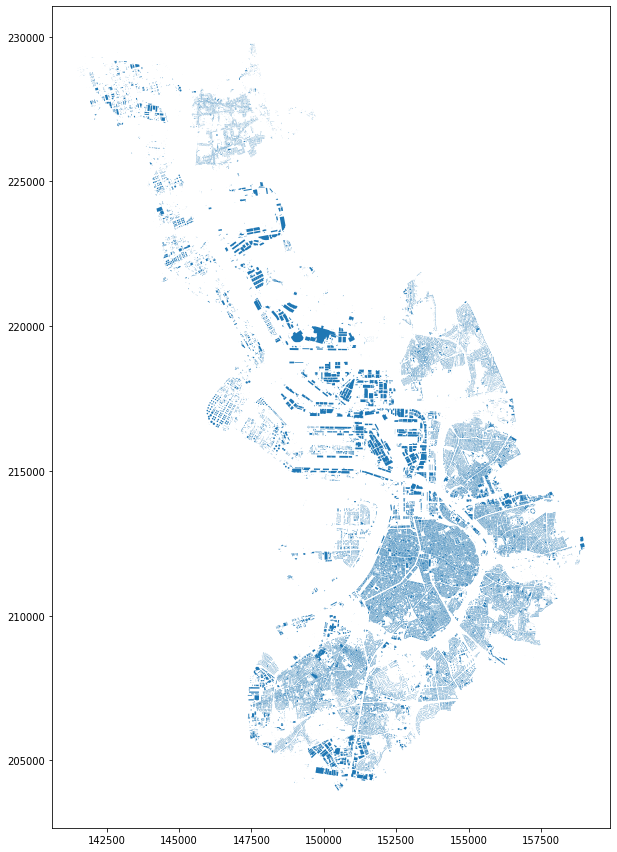

In [51]:
import time
start = time.time()
antwerpen.plot(figsize=(10,30))
print(f"Took {round(time.time() -start, 2)} seconds")

In [41]:
import pandas as pd
data_lookup = pd.read_csv("./data_lookup.csv", sep="|")
data_lookup

,ROOT,PATH,BOX,DSM,DTM,SHP
0,k01,ROOT,145000 238000 162000 247000 17000 9000,NaN,NaN,NaN
1,k01,0_0_0_0_0,145000 246719 145531 247000 531 281,./k01/0_0_0_0_0/DSM.tif,NaN,NaN
2,k01,0_0_0_0_1,145531 246719 146062 247000 531 281,./k01/0_0_0_0_1/DSM.tif,NaN,NaN
3,k01,0_0_0_0_2,145000 246438 145531 246719 531 281,./k01/0_0_0_0_2/DSM.tif,NaN,NaN
4,k01,0_0_0_0_3,145531 246438 146062 246719 531 281,./k01/0_0_0_0_3/DSM.tif,NaN,NaN
...,...,...,...,...,...,...
1020,k01,3_3_3_2_3,160406 238000 160937 238281 531 281,./k01/3_3_3_2_3/DSM.tif,NaN,NaN
1021,k01,3_3_3_3_0,160937 238281 161468 238562 531 281,./k01/3_3_3_3_0/DSM.tif,NaN,NaN
1022,k01,3_3_3_3_1,161468 238281 161999 238562 531 281,./k01/3_3_3_3_1/DSM.tif,NaN,NaN
1023,k01,3_3_3_3_2,160937 238000 161468 238281 531 281,./k01/3_3_3_3_2/DSM.tif,NaN,NaN


In [39]:
import rasterio as rio
from rasterio.plot import show
idx = 0

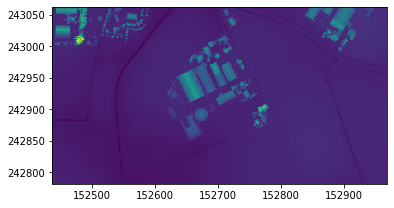

BoundingBox(left=152437.5, bottom=242781.5, right=152968.5, top=243062.5)


In [294]:
file = rio.open(data_lookup.loc[idx].DSM) 
show(file)
print(file.bounds)
idx +=1